## Importing Libraries & API Key

In [1]:
# youtube API key
with open('apikey.txt') as file:
    ytAPI_key = file.read()

In [3]:
# import library
from googleapiclient.discovery import build

In [18]:
# import usual libraries
import numpy as np
import pandas as pd

In [77]:
# to see entire output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [22]:
# download nltk corpus (first time only)
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/sashacrowe/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/sashacrowe/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/sashacrowe/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/sashacrowe/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/sashacrowe/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloadin

True

In [23]:
# import sentiment analysis libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [84]:
# language detection
#from langdetect import detect, DetectorFactory

In [85]:
#import re

In [171]:
# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the YouTube Video Titles

In [107]:
# Update query with search term, maxResults to number of video titles you want to pull, & n_pages

class Youtube():
    def __init__(self,query,maxResults):
        self.query=query
        self.maxResults=maxResults
        self._next_page_token = None

    def search_videos(self):
        youtube = build('youtube', 'v3', developerKey=ytAPI_key)
        request = youtube.search().list(part='id', type='video', q=self.query, maxResults=self.maxResults, pageToken=self._next_page_token)
        response = request.execute()
        self._next_page_token = response["nextPageToken"]
        return response

    def get_video_details(self,count,video_id):
        youtube = build('youtube', 'v3', developerKey=ytAPI_key)
        request = youtube.videos().list(part='snippet,statistics', id=video_id)
        response = request.execute()
        title = response['items'][0]['snippet']['title']
        return title

    def main(self, n_pages: int = 1):
        result = []
        for i in range(n_pages):
            videos = self.search_videos()
            video_list=videos['items']
            for i in range(len(video_list)):
                video_id=video_list[i]['id']['videoId']
                result.append(self.get_video_details(i+1,video_id))
        return result

gen_alpha = Youtube(query='Gen Alpha', maxResults=500)
video_titles_alpha = gen_alpha.main(n_pages=10)

gen_z = Youtube(query='Gen Z', maxResults=500)
video_titles_z = gen_z.main(n_pages=10)

millenials = Youtube(query='Millenials', maxResults=500)
video_titles_mil = millenials.main(n_pages=10)

gen_x = Youtube(query='Gen X', maxResults=500)
video_titles_x = gen_x.main(n_pages=10)

boomers = Youtube(query='Boomers', maxResults=500)
video_titles_boom = boomers.main(n_pages=10)

In [108]:
# double-checking the number of results
len(video_titles_alpha)

500

In [109]:
# taking a look at the titles
video_titles_alpha

['How the Internet Destroyed Generation Alpha',
 'Gen Alpha Adults Year 2043',
 'Gen Alpha is COOKED',
 'Gen Alpha is Absolutely COOKED',
 'The Real Reason Everyone Hates Gen Alpha',
 'Generation Alpha is DOOMED',
 'GEN-ALPHA: The Most DOOMED Generation?',
 'gen z after seeing ONE gen alpha meme',
 'YouTubers VS. Gen Alpha Content Farms (video by @SMG4) (if you are a good YTber, look at Desc)',
 'Gen Alpha Is Having An Identity Crisis...',
 'Are you Gen Z Or Gen Alpha?',
 'are we overreacting about generation alpha?',
 'Gen Alpha Influencers Are a NIGHTMARE',
 'Are we creating a generation of self-absorbed bullies? || Motherhood In Progress',
 'struggling to understand gen alpha slangs',
 'Do You Know These Gen Alpha Words?',
 'Gen Alpha (2013-2025) Runs For President #comedy',
 'POV: No one can agree on the year when Gen Z ends and Gen Alpha begins! #genz #genalpha #relatable',
 "The world isn't ready for Gen Alpha",
 'Gen Alpha as Adults be like',
 'How Gen Alpha Broke School',
 'Gen

In [110]:
# in order to analyze the data we first need to create a DataFrame object in Python
alpha_df = pd.DataFrame(video_titles, columns=['titles'])

In [111]:
alpha_df

,titles
0,How the Internet Destroyed Generation Alpha
1,Gen Alpha Adults Year 2043
2,Gen Alpha is COOKED
3,Do You Know These Gen Alpha Words?
4,Gen Alpha is Absolutely COOKED
5,Generation Alpha is DOOMED
6,GEN-ALPHA: The Most DOOMED Generation?
7,gen z after seeing ONE gen alpha meme
8,"YouTubers VS. Gen Alpha Content Farms (video by @SMG4) (if you are a good YTber, look at Desc)"
9,Gen Alpha Is Having An Identity Crisis...


### Removing Non-English Titles
NOT NEEDED! after running the analysis, I see that the titles in other languages result in neutral score and there's not so many in proportion to the English titles, so it's not going to have a negative effect ALSO there might be a vid or two on Gen Z only

In [64]:
# # To ensure reproducibility
# DetectorFactory.seed = 0

# # Regular expression pattern to match Latin alphabet characters
# latin_pattern = re.compile(r'^[\w\s.,!?\'"-#\u0020-\u02AF\u1F600-\u1F64F\u200d\uFE0F]*$', re.UNICODE)


# # Function to detect English strings
# def is_english(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False


# # Function to check if the text contains only Latin characters
# def is_latin(text):
#     return bool(latin_pattern.match(text))


# # Combined function to filter out strings that are either not in English or not Latin
# def is_english_and_latin(text):
#     return is_english(text) and is_latin(text)

In [65]:
# Apply the combined function to filter the DataFrame
#yt_df['is_english_and_latin'] = yt_df['titles'].apply(is_english_and_latin)

In [66]:
# to remove specific rows
#yt_df.drop(index=204)

In [ ]:
#yt_df

## Text Preprocessing 
a crucial step in performing sentiment analysis, as it helps to clean and normalize the text data, making it easier to analyze   

Common text preprocessing techniques include:
- tokenization -> separates individual words from the raw text 
- stop word removal -> removing common and irrelevant words that are unlikely to convey sentiment, such as 'the'
- stemming -> reduce words to their base form such as "jumping" to "jump"
- and lemmatization -> reducing words to their base form based on their part of speech, eg "jumping" remains as such

In [24]:
"""
this function first tokenizes the strings using word_tokenize function from NLTK, 
then it removes step words using stepwords module from NLTK, 
and finally it lemmatizes the filtered_tokens using WordNetLemmatizer from NLTK
"""

# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())


    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [133]:
# apply the function df
alpha_df['titles'] = alpha_df['titles'].apply(preprocess_text)

In [134]:
alpha_df

,titles,sentiment_score,pos_or_neg
0,internet destroyed generation alpha,-0.4939,Negative
1,gen alpha adult year 2043,0.0000,Neutral
2,gen alpha cooked,0.0000,Neutral
3,know gen alpha word ?,0.0000,Neutral
4,gen alpha absolutely cooked,0.0000,Neutral
5,generation alpha doomed,-0.6369,Negative
6,gen-alpha : doomed generation ?,-0.6369,Negative
7,gen z seeing one gen alpha meme,0.0000,Neutral
8,"youtubers vs. gen alpha content farm ( video @ smg4 ) ( good ytber , look desc )",0.4404,Positive
9,gen alpha identity crisis ...,-0.6249,Negative


## NLTK Sentiment Analyzer

Here a Lexicon-based analysis is applied
- uses a set of predefined rules and heuristics to determine the sentiment of a piece of text
- These rules are typically based on lexical and syntactic features of the text, such as the presence of positive or negative words and phrases
- NLTK Vader sentiment analyzer is an example of this
- NLTK Vader API accepts text as an input instead of numeric vectors
- while relatively simple to implement and interpret, it may not be as accurate as ML-based or transformed-based approaches

In [79]:
"""
Define a function called get_sentiment that takes a text string as its input. 
The function calls the polarity_scores method of the analyzer object to obtain a dictionary of sentiment scores for the text, 
which includes a score for positive, negative, and neutral sentiment.
"""

# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']
    
# create a string response to the get_sentiment function 
def pos_or_neg(score):   
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    elif score < 0:
        return 'Negative'

In [135]:
"""
Finally, apply the get_sentiment function to the reviewText column of the df DataFrame using the apply method. 
This creates a new column called sentiment in the DataFrame, which stores the sentiment score for each review.
"""

# apply get_sentiment function
alpha_df['sentiment_score'] = alpha_df['titles'].apply(get_sentiment)

In [136]:
# apply get_sentiment function
alpha_df['pos_or_neg'] = alpha_df['sentiment_score'].apply(pos_or_neg)

In [137]:
alpha_df.head(10)

,titles,sentiment_score,pos_or_neg
0,internet destroyed generation alpha,-0.4939,Negative
1,gen alpha adult year 2043,0.0000,Neutral
2,gen alpha cooked,0.0000,Neutral
3,know gen alpha word ?,0.0000,Neutral
4,gen alpha absolutely cooked,0.0000,Neutral
5,generation alpha doomed,-0.6369,Negative
6,gen-alpha : doomed generation ?,-0.6369,Negative
7,gen z seeing one gen alpha meme,0.0000,Neutral
8,"youtubers vs. gen alpha content farm ( video @ smg4 ) ( good ytber , look desc )",0.4404,Positive
9,gen alpha identity crisis ...,-0.6249,Negative


In [138]:
round(alpha_df['sentiment_score'].describe(),3)

count    500.000
mean       0.004
std        0.290
min       -0.784
25%        0.000
50%        0.000
75%        0.000
max        0.812
Name: sentiment_score, dtype: float64

In [139]:
alpha_df['pos_or_neg'].value_counts().to_frame()

,count
pos_or_neg,
Neutral,290
Positive,113
Negative,97


In [140]:
alpha_senti_df = alpha_df['pos_or_neg'].value_counts().to_frame()
alpha_senti_df['percentage'] = (alpha_senti_df['count'] / 500) * 100

print(alpha_senti_df)

            count  percentage
pos_or_neg                   
Neutral       290        58.0
Positive      113        22.6
Negative       97        19.4


In [160]:
alpha_senti_df.rename(columns={'count': 'alpha_#', 'percentage': 'alpha_%'}, inplace=True)

## Comparing Against Other Generations

#### Gen Z

In [141]:
# first create a DataFrame object in Python
genz_df = pd.DataFrame(video_titles_z, columns=['titles'])

In [142]:
# second apply the preprocess function to the df
genz_df['titles'] = genz_df['titles'].apply(preprocess_text)

In [143]:
# third apply get_sentiment function
genz_df['sentiment_score'] = genz_df['titles'].apply(get_sentiment)

In [144]:
# fourth apply get_sentiment function
genz_df['pos_or_neg'] = genz_df['sentiment_score'].apply(pos_or_neg)

In [145]:
# fifth get the result stats
round(genz_df['sentiment_score'].describe(),3)

count    500.000
mean      -0.008
std        0.267
min       -0.859
25%        0.000
50%        0.000
75%        0.000
max        0.878
Name: sentiment_score, dtype: float64

In [146]:
# sixth get the sentiment df
genz_senti_df = genz_df['pos_or_neg'].value_counts().to_frame()
genz_senti_df['percentage'] = (genz_senti_df['count'] / 500) * 100

print(genz_senti_df)

            count  percentage
pos_or_neg                   
Neutral       343        68.6
Negative       80        16.0
Positive       77        15.4


In [162]:
genz_senti_df.rename(columns={'count': 'genz_#', 'percentage': 'genz_%'}, inplace=True)

#### Millennials

In [147]:
# first create a DataFrame object in Python
mil_df = pd.DataFrame(video_titles_mil, columns=['titles'])

# second apply the preprocess function to the df
mil_df['titles'] = mil_df['titles'].apply(preprocess_text)

# third apply get_sentiment function
mil_df['sentiment_score'] = mil_df['titles'].apply(get_sentiment)

# fourth apply get_sentiment function
mil_df['pos_or_neg'] = mil_df['sentiment_score'].apply(pos_or_neg)

In [148]:
# fifth get the result stats
round(mil_df['sentiment_score'].describe(),3)

count    500.000
mean       0.078
std        0.284
min       -0.668
25%        0.000
50%        0.000
75%        0.250
max        0.898
Name: sentiment_score, dtype: float64

In [153]:
# sixth get the sentiment df
mil_senti_df = mil_df['pos_or_neg'].value_counts().to_frame()
mil_senti_df['percentage'] = (mil_senti_df['count'] / 500) * 100

print(mil_senti_df)

            count  percentage
pos_or_neg                   
Neutral       298        59.6
Positive      136        27.2
Negative       66        13.2


In [163]:
mil_senti_df.rename(columns={'count': 'mil_#', 'percentage': 'mil_%'}, inplace=True)

#### Gen X

In [154]:
# first create a DataFrame object in Python
genx_df = pd.DataFrame(video_titles_x, columns=['titles'])

# second apply the preprocess function to the df
genx_df['titles'] = genx_df['titles'].apply(preprocess_text)

# third apply get_sentiment function
genx_df['sentiment_score'] = genx_df['titles'].apply(get_sentiment)

# fourth apply get_sentiment function
genx_df['pos_or_neg'] = genx_df['sentiment_score'].apply(pos_or_neg)

In [155]:
# fifth get the result stats
round(genx_df['sentiment_score'].describe(),3)

count    500.000
mean      -0.004
std        0.338
min       -0.812
25%        0.000
50%        0.000
75%        0.077
max        0.822
Name: sentiment_score, dtype: float64

In [156]:
# sixth get the sentiment df
genx_senti_df = genx_df['pos_or_neg'].value_counts().to_frame()
genx_senti_df['percentage'] = (genx_senti_df['count'] / 500) * 100

print(genx_senti_df)

            count  percentage
pos_or_neg                   
Neutral       252        50.4
Positive      129        25.8
Negative      119        23.8


In [164]:
genx_senti_df.rename(columns={'count': 'genx_#', 'percentage': 'genx_%'}, inplace=True)

#### Boomers

In [157]:
# first create a DataFrame object in Python
boom_df = pd.DataFrame(video_titles_boom, columns=['titles'])

# second apply the preprocess function to the df
boom_df['titles'] = boom_df['titles'].apply(preprocess_text)

# third apply get_sentiment function
boom_df['sentiment_score'] = boom_df['titles'].apply(get_sentiment)

# fourth apply get_sentiment function
boom_df['pos_or_neg'] = boom_df['sentiment_score'].apply(pos_or_neg)

In [158]:
# fifth get the result stats
round(boom_df['sentiment_score'].describe(),3)

count    500.000
mean      -0.021
std        0.297
min       -0.898
25%        0.000
50%        0.000
75%        0.000
max        0.784
Name: sentiment_score, dtype: float64

In [159]:
# sixth get the sentiment df
boom_senti_df = boom_df['pos_or_neg'].value_counts().to_frame()
boom_senti_df['percentage'] = (boom_senti_df['count'] / 500) * 100

print(boom_senti_df)

            count  percentage
pos_or_neg                   
Neutral       288        57.6
Positive      108        21.6
Negative      104        20.8


In [165]:
boom_senti_df.rename(columns={'count': 'boom_#', 'percentage': 'boom_%'}, inplace=True)

#### Big Comparison Table

In [166]:
generational_df = pd.concat([alpha_senti_df, genz_senti_df, mil_senti_df, genx_senti_df, boom_senti_df], axis=1)
print(generational_df)

            alpha_#  alpha_%  genz_#  genz_%  mil_#  mil_%  genx_#  genx_%  \
pos_or_neg                                                                   
Neutral         290     58.0     343    68.6    298   59.6     252    50.4   
Positive        113     22.6      77    15.4    136   27.2     129    25.8   
Negative         97     19.4      80    16.0     66   13.2     119    23.8   

            boom_#  boom_%  
pos_or_neg                  
Neutral        288    57.6  
Positive       108    21.6  
Negative       104    20.8  


In [168]:
generational_count_df = generational_df.drop(['alpha_%','genz_%','mil_%','genx_%','boom_%' ], axis=1)
print(generational_count_df)

            alpha_#  genz_#  mil_#  genx_#  boom_#
pos_or_neg                                        
Neutral         290     343    298     252     288
Positive        113      77    136     129     108
Negative         97      80     66     119     104


In [169]:
generational_percent_df = generational_df.drop(['alpha_#','genz_#','mil_#','genx_#','boom_#' ], axis=1)
print(generational_percent_df)

            alpha_%  genz_%  mil_%  genx_%  boom_%
pos_or_neg                                        
Neutral        58.0    68.6   59.6    50.4    57.6
Positive       22.6    15.4   27.2    25.8    21.6
Negative       19.4    16.0   13.2    23.8    20.8


#### Graphs

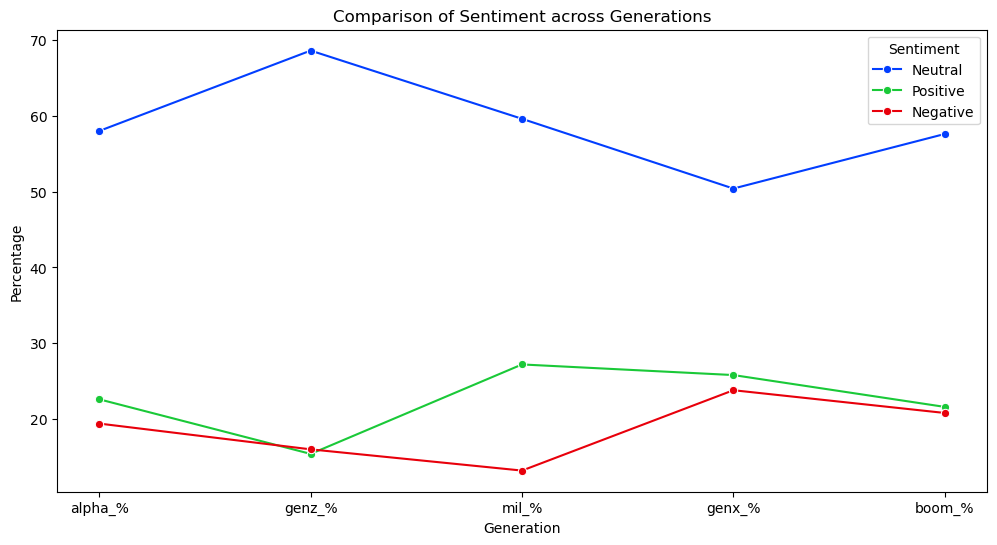

In [198]:
# transpose df for easier manipulation
pplot_df = generational_percent_df.transpose()
pplot_df.reset_index(inplace=True)
pplot_df.rename(columns={'index': 'Generation'}, inplace=True)

# Melt the DataFrame for Seaborn
pplot_df = pd.melt(pplot_df, id_vars='Generation', var_name='Sentiment', value_name='Percentage')

palette = {
    'Neutral': (0.00784313725490196, 0.24313725490196078, 1.0),  # blue for Neutral
    'Positive': (0.10196078431372549, 0.788235294117647, 0.2196078431372549), # green for Positive
    'Negative': (0.9098039215686274, 0.0, 0.043137254901960784), # red for Negative
}

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=pplot_df, x='Generation', y='Percentage', hue='Sentiment', marker='o',palette=palette)

# Labels and title
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.title('Comparison of Sentiment across Generations')
plt.legend(title='Sentiment')

# Show the plot
plt.show()

In [195]:
sns.color_palette("bright").as_hex

<bound method _ColorPalette.as_hex of [(0.00784313725490196, 0.24313725490196078, 1.0), (1.0, 0.48627450980392156, 0.0), (0.10196078431372549, 0.788235294117647, 0.2196078431372549), (0.9098039215686274, 0.0, 0.043137254901960784), (0.5450980392156862, 0.16862745098039217, 0.8862745098039215), (0.6235294117647059, 0.2823529411764706, 0.0), (0.9450980392156862, 0.2980392156862745, 0.7568627450980392), (0.6392156862745098, 0.6392156862745098, 0.6392156862745098), (1.0, 0.7686274509803922, 0.0), (0.0, 0.8431372549019608, 1.0)]>

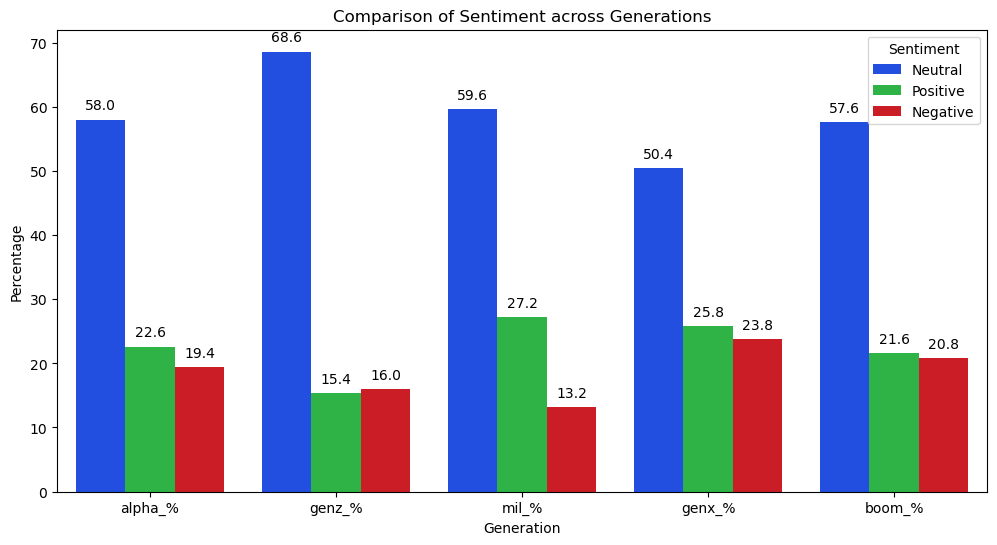

In [197]:
# Define the color palette
palette = {
    'Neutral': (0.00784313725490196, 0.24313725490196078, 1.0),  # blue for Neutral
    'Positive': (0.10196078431372549, 0.788235294117647, 0.2196078431372549), # green for Positive
    'Negative': (0.9098039215686274, 0.0, 0.043137254901960784), # red for Negative
}

# Plotting a grouped bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=pplot_df, x='Generation', y='Percentage', hue='Sentiment', palette=palette)

# Add annotations
for p in barplot.patches:
    percentage = format(p.get_height(), '.1f')
    if p.get_height() > 0:
        barplot.annotate(
            percentage, 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points'
        )

# Labels and title
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.title('Comparison of Sentiment across Generations')
plt.legend(title='Sentiment')

# Show the plot
plt.show()

#### Most negative or positive video on Gen Alpha

**Most Negative Video**

In [201]:
alpha_df.loc[alpha_df['sentiment_score'].idxmin()]

titles             wtf wrong gen alpha
sentiment_score                -0.7845
pos_or_neg                    Negative
Name: 429, dtype: object

In [202]:
alpha_df.nsmallest(5, 'sentiment_score')

,titles,sentiment_score,pos_or_neg
429,wtf wrong gen alpha,-0.7845,Negative
125,teacher sick dumb gen alpha kid ..,-0.7650,Negative
158,"teacher vs. gen z & alpha : bad parenting , social medium & zero discipline ruined generation 😳",-0.7650,Negative
49,"gen alpha getting worse , mom go viral : `` kid scare ``",-0.7430,Negative
452,"filtercopy | savage millennial v savage gen z | ft. devishi madaan , @ manishkharage & rohan shah",-0.7184,Negative


**Most Positive Video**

In [203]:
alpha_df.loc[alpha_df['sentiment_score'].idxmax()]

titles             best alpha 3 gen player good !
sentiment_score                            0.8122
pos_or_neg                               Positive
Name: 482, dtype: object

In [204]:
alpha_df.nlargest(5, 'sentiment_score')

,titles,sentiment_score,pos_or_neg
482,best alpha 3 gen player good !,0.8122,Positive
275,pov : gen alpha getting kidnapped # short # comedy # funny # lol # subscribe # trending # viral # fypシ゚,0.8020,Positive
311,successfully converse gen alpha trixie katya | bald & beautiful podcast,0.7964,Positive
64,generation alpha putting skincare top holiday wish list,0.7351,Positive
111,gen alpha v spelling bee😭 # teacher # genz # genalpha # spelling # comedy # english # school # funny,0.6597,Positive
